![matplotlib](https://matplotlib.org/_static/logo2.png)
# Data Visualization with Matplotlib


### Why is visualization important?


There are a lot of visualizations out there these days.

Ultimately they are about quickly revealing relationships and anomolies.

While we will review what makes a **GOOD** visualization later, we will cover a few basic types today.

Let's look at some [examples from python graphs](https://python-graph-gallery.com/)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


<img src="https://python-graph-gallery.com/wp-content/uploads/Logo_PGG_full-3.jpg" width=600>

The [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) has some great resources to guide you through the code needed to create each type of matplotlib plot. 

### Plot Anatomy
Let's spend some time on the terminology of a plot. There are a lot of options to set in matplotlib plots, so let's identify some common terminology. 

The sequence of events with matplotlib are:

| Step | Code Example |
| :---- | :------------ |
| 1. Create figure | `fig = plt.figure(figsize=(2, 4))` |
| 2. Create axis object | `ax = plt.subplot()` |
| 3. Make adjustments | `plt.title`, `ax.set_xticks`, etc |
| 4. Show final plot | `plt.show()` . |


The [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) shows a list of options you can set within a plot.

<img src="https://matplotlib.org/_images/sphx_glr_anatomy_001.png" width=550>


Let's look [how they created this plot.](https://matplotlib.org/gallery/showcase/anatomy.html)

<Figure size 432x288 with 0 Axes>

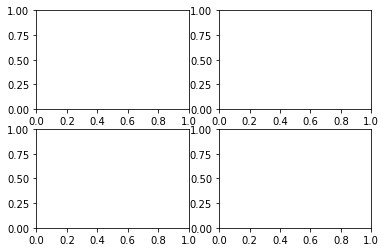

In [8]:
fig = plt.figure()
ax = plt.subplots(2, 2)

In [9]:
type(ax)

tuple

In [11]:
ax[4]

IndexError: tuple index out of range

In [ ]:
fig.add_subplot()

### 1 Barplots
Barplots are used for displaying __one dimensional__, __discrete__ data. You call plt.bar with two arguments:
- the x — a list of x-positions for each bar
- the y-values — a list of heights for each bar

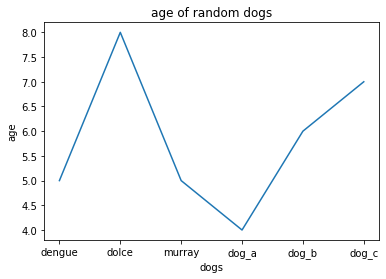

In [15]:
# an example of a bar plot
ax = plt.subplot()
our_dogs = ["dengue", "dolce", "murray", "dog_a", "dog_b", "dog_c"]
dogs_age = [5, 8, 5, 4, 6, 7]

plt.plot(our_dogs, dogs_age)

plt.title('age of random dogs')
plt.xlabel('dogs')
plt.ylabel('age')
plt.show()

In [16]:
import pandas as pd
df = pd.DataFrame()
df['age'] = dogs_age
df['names'] = our_dogs
df

,age,names
0,5,dengue
1,8,dolce
2,5,murray
3,4,dog_a
4,6,dog_b
5,7,dog_c


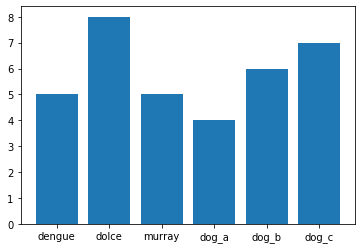

In [25]:
plt.bar('names', 'age', data=df)


<BarContainer object of 6 artists>

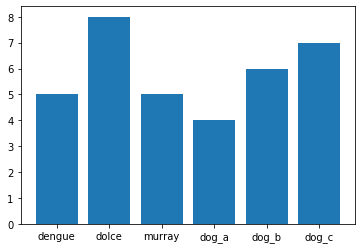

In [23]:
plt.bar(df.names, df.age)

[What is ax and figure?](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

Text(0.5, 1.0, 'cat age')

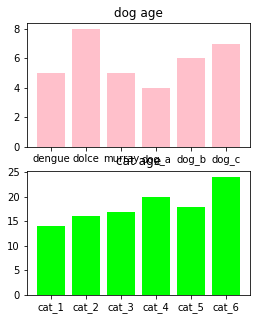

In [30]:
# utilizing the subplot function and creating subplots
our_cats = ["cat_1", "cat_2", "cat_3", "cat_4", "cat_5", "cat_6"]
cats_age = [14, 16, 17, 20, 18, 24]
fig = plt.figure(figsize=(4, 5))
plt.subplot(2, 1, 1)
plt.bar(our_dogs, dogs_age, color='pink')
plt.title('dog age')
plt.subplot(2, 1, 2)
plt.bar(our_cats, cats_age, color='#00FF00')
plt.title('cat age')

What is something that you notice here that needs to be fixed?

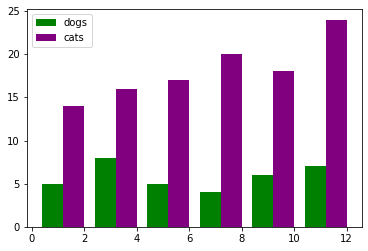

In [31]:
# we can create overlaid or side-by-side bargraph. You need
# to shift the x value by width to accommodate for two graphs.

fig = plt.figure()
n = 1  # This is our first dataset (out of 2)
t = 2  # Number of datasets
d = 6  # Number of sets of bars
w = 0.8  # Width of each bar

# essentially, this list comprehension gives us the position
dog_values = [t*element + w*n for element in range(d)]

# of the position of dogs
plt.bar(dog_values, dogs_age, color='green')


n = 2  # This is our second dataset (out of 2)
t = 2  # Number of datasets
d = 6  # Number of sets of bars
w = 0.8  # Width of each bar

cat_values = [t*element + w*n for element in range(d)]

plt.bar(cat_values, cats_age, color='purple')
plt.legend(["dogs", "cats"])

In [32]:
print(dog_values)
print(cat_values)

[0.8, 2.8, 4.8, 6.8, 8.8, 10.8]
[1.6, 3.6, 5.6, 7.6, 9.6, 11.6]


In [34]:
df['type'] = 'dog'

In [35]:
df

,age,names,type
0,5,dengue,dog
1,8,dolce,dog
2,5,murray,dog
3,4,dog_a,dog
4,6,dog_b,dog
5,7,dog_c,dog


In [36]:
catsdf = pd.DataFrame()
catsdf['age'] = cats_age
catsdf['names'] = our_cats
catsdf['type'] = 'cat'
catsdf

,age,names,type
0,14,cat_1,cat
1,16,cat_2,cat
2,17,cat_3,cat
3,20,cat_4,cat
4,18,cat_5,cat
5,24,cat_6,cat


In [41]:
all_df = pd.concat((df, catsdf))

<BarContainer object of 6 artists>

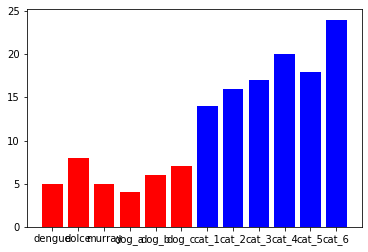

In [43]:
plt.bar('names', 'age', data=all_df[all_df['type'] == 'dog'], color='r')
plt.bar('names', 'age', data=all_df[all_df['type'] == 'cat'], color='b')


In [55]:
for x in zip(ticket_sales_in_millon, people_attended_in_thousands*2, range(2)):
    print(x)

(114, 126, 0)
(62, 114, 1)


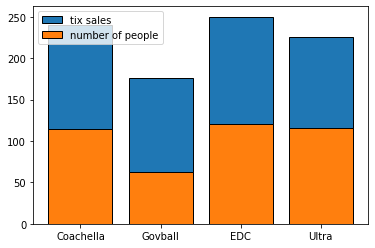

In [50]:
# stacked barplots
ax = plt.subplot()
music_festivals = ["Coachella", "Govball", "EDC", "Ultra"]
ticket_sales_in_millon = [114, 62, 120, 116]
people_attended_in_thousands = [126, 114, 130, 110]

plt.bar(range(len(music_festivals)),
        people_attended_in_thousands,
        bottom=ticket_sales_in_millon,
        edgecolor='k')
plt.bar(range(len(music_festivals)),
        ticket_sales_in_millon, edgecolor='k')

plt.legend(["tix sales", "number of people"])
ax.set_xticks(range(0, len(music_festivals)))
ax.set_xticklabels(music_festivals)
plt.show()

### Bar plot - animal shelter dataset

Let's make a bar plot comparing dogs and cats by month when they are admitted to the shelter.

In [56]:
animal_shelter_df = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [57]:
animal_shelter_df.columns = [x.lower().replace(' ','_') for x in animal_shelter_df.columns]

In [58]:
animal_shelter_df.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


0         05
1         07
2         02
3         03
4         10
          ..
115779    02
115780    02
115781    02
115782    03
115783    02
Name: datetime, Length: 115784, dtype: object

In [62]:
animal_shelter_df['month'] = animal_shelter_df.datetime.str[:2]

In [63]:
animal_shelter_df

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,month
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,05
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,07
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,02
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,03
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115779,A810242,*Puff,02/25/2020 09:36:00 AM,02/25/2020 09:36:00 AM,11/17/2019,Adoption,Foster,Cat,Spayed Female,3 months,Domestic Shorthair,Calico/White,02
115780,A805662,NaN,02/25/2020 09:08:00 AM,02/25/2020 09:08:00 AM,09/08/2019,Adoption,Foster,Cat,Neutered Male,5 months,Domestic Shorthair,Brown Tabby,02
115781,A767794,Atlas,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,01/30/2018,Adoption,Foster,Dog,Neutered Male,2 years,Australian Cattle Dog Mix,Black/White,02
115782,A789760,*Mr. Paws,03/09/2019 11:34:00 AM,03/09/2019 11:34:00 AM,02/27/2017,Return to Owner,NaN,Dog,Neutered Male,2 years,Black Mouth Cur Mix,Brown/White,03


In [69]:
animal_shelter_df.ix[:, 'animal_type']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0         Cat
1         Dog
2         Dog
3         Cat
4         Cat
         ... 
115779    Cat
115780    Cat
115781    Dog
115782    Dog
115783    Cat
Name: animal_type, Length: 115784, dtype: object

In [82]:
counts_df = animal_shelter_df.loc[animal_shelter_df['animal_type'].isin(['Cat', 'Dog']), ['animal_id', 'month', 'animal_type']].groupby(['animal_type', 'month']).count()
counts_df = counts_df.reset_index()

In [83]:
counts_df

,animal_type,month,animal_id
0,Cat,01,2592
1,Cat,02,1988
2,Cat,03,1944
3,Cat,04,2576
4,Cat,05,3805
5,Cat,06,5125
6,Cat,07,5237
7,Cat,08,4721
8,Cat,09,4089
9,Cat,10,4339


<BarContainer object of 12 artists>

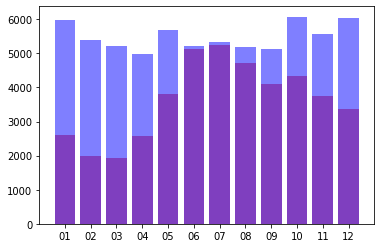

In [90]:
plt.bar('month', 'animal_id', data=counts_df[counts_df['animal_type'] == 'Cat'], color='r', alpha=.5)
plt.bar('month', 'animal_id', data=counts_df[counts_df['animal_type'] == 'Dog'], color='b', alpha=.5)

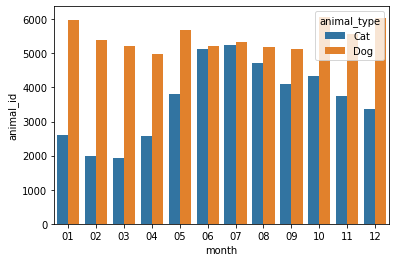

In [99]:
import seaborn as sns
sns.barplot('month', 'animal_id', hue='animal_type', data=counts_df)

### 2 Histogram
Histograms are like barplots in the sense that it describe __one-dimensional__ data. A histogram divides the variable into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing __continuous__ variables. <br>

From the documentation: compute and draw the histogram of x. The return value is a tuple (__n, bins, patches__) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

Comparison of barplots and histogram
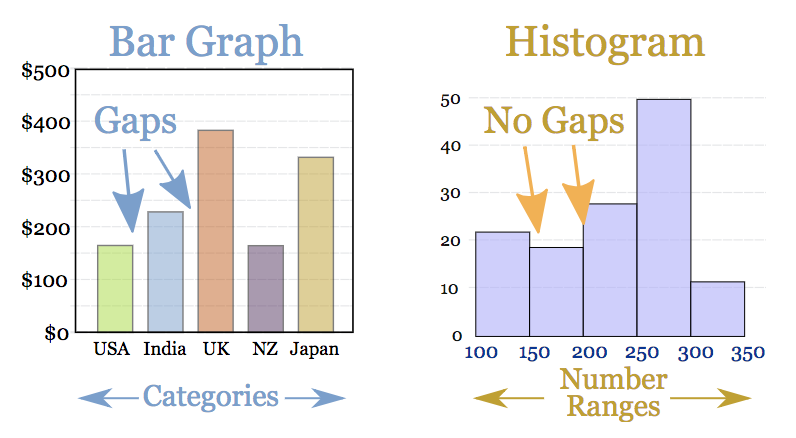

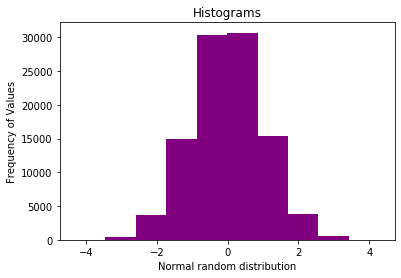

In [93]:
# Set seed for reproducability
np.random.seed(2018)

# Generate 1000 values from 0 standard normal distribution
x = np.random.randn(100000)

# Plot the distogram with hist() function
plt.hist(x, bins=10, color='purple')

plt.xlabel('Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

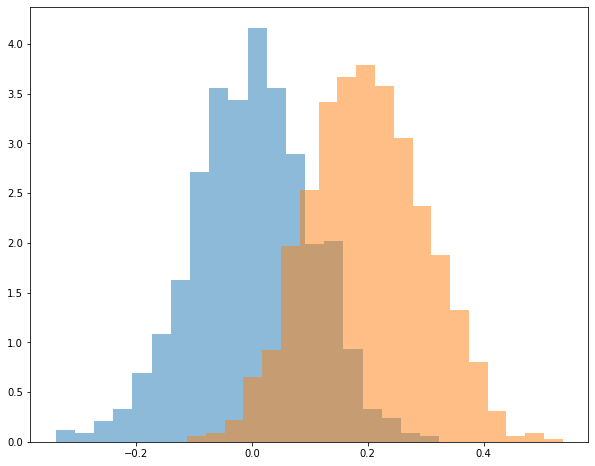

In [95]:
# overlaid histograms for two distributions
# plotting two histograms
mu1, sigma1 = 0, 0.1  # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
mu2, sigma2 = 0.2, 0.1
s2 = np.random.normal(mu2, sigma2, 1000)
plt.figure(figsize=(10, 8))
plt.hist(s1, bins=20, density=True, alpha=.5)
plt.hist(s2, bins=20, density=True, alpha=.5)
plt.show()

### 3. Scatterplot - visualizing two dimensional data
Scatterplots are usually used for visualizing two dimensional data (observations with two variables). It allows us to examine the relationship between two variables, thus it is sometimes called a correlation plot. 

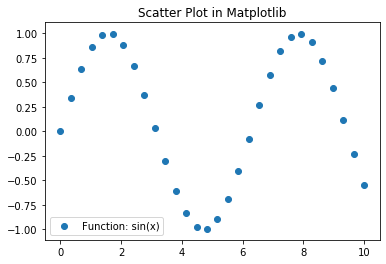

In [96]:
# generate some data -> the sine wave
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, label="Function: sin(x)")
plt.title('Scatter Plot in Matplotlib')
plt.legend()
plt.show()

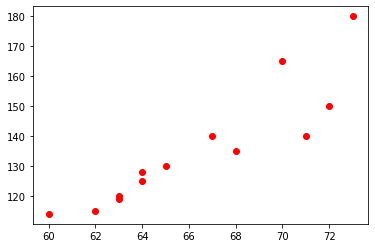

In [97]:
# examining correlation with height and weight
height = [63, 62, 60, 63, 64, 65, 68, 67, 64, 71, 72, 70, 73]
weight = [120, 115, 114, 119, 125, 130, 135, 140, 128, 140, 150, 165, 180]
plt.scatter(height, weight, color='r')
plt.show()

### 4 - Pie Charts

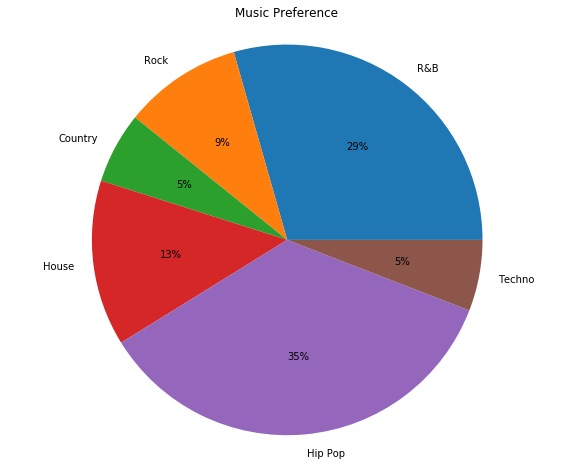

In [98]:
# pie chart
music_genre = ['R&B', 'Rock', 'Country', 'House', 'Hip Pop', 'Techno']
num_people_like = [15, 5, 3, 7, 18, 3]

# Make your plot here
plt.figure(figsize=(10, 8))
plt.pie(num_people_like, labels=music_genre, autopct="%1d%%")

plt.axis('equal')
plt.title('Music Preference')

plt.show()

![seaborn](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/07/seaborn.png) 
# The good, the bad, the seaborn


#### Whats wrong with this data visualization?

<img src="https://pbs.twimg.com/media/DNTFhGaXcAEbrMO.jpg" width=700>

Learning goals:
- Create a list of best practices for data visualization
- Identify the differences between matplotlib and seaborn
- Create a visualization with seaborn, applying best practices

## Best practices for data visualization

Documenting best practices:

After class, read these articles about the Dos and Don'ts of Visaulizations:
- [article 1](https://www.jackhagley.com/What-s-the-difference-between-an-Infographic-and-a-Data-Visualisation)
- [article 2](https://thoughtbot.com/blog/analyzing-minards-visualization-of-napoleons-1812-march)
- [article 3](http://dataremixed.com/2016/04/the-design-of-everyday-visualizations/)
- [article 4](https://visme.co/blog/data-storytelling-tips/)
- [article 5](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)
- [article 6](files/VisualizationsThatReallyWork.pdf)


## Differences between seaborn & matplotlib


### Two code examples to accomplish the same plot:

**Resources:**
- [python graph gallery on seaborn](https://python-graph-gallery.com/seaborn/)
- [seaborn](https://seaborn.pydata.org/)


In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load in data
tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")


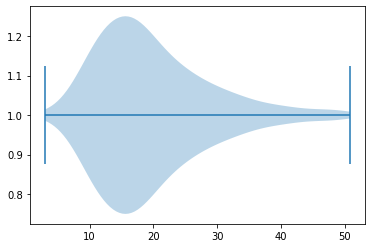

In [101]:
# Matplotlib:

# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Create violinplot
ax.violinplot(tips["total_bill"], vert=False)

# Show the plot
plt.show()

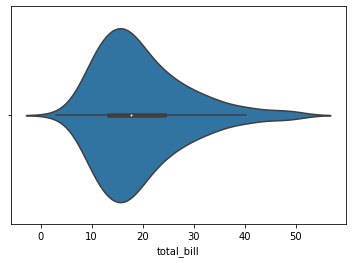

In [102]:
# Seaborn:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tips = sns.load_dataset("tips")
# tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

# Create violinplot

sns.violinplot(x = "total_bill", data=tips)

# Show the plot
plt.show()

## Your turn: Create a visualization with seaborn, applying best practices

[exercise from data world](https://data.world/makeovermonday/2018w37-paying-the-president)


In [ ]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/5qxp2ldwsel3ow2pq5mkvfas2rfaup')


#### For extra fun:
[visualization challenges](http://www.storytellingwithdata.com/blog/2019/3/1/swdchallenge-visualize-this-data)

[seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)